<a href="https://colab.research.google.com/github/tarik19x/1st-Django-App-Using-Django-and-Bootstrap/blob/master/Task_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#$$\color{black}{\textbf{Reg.No: 2017331019} }$$

<br>

# **$$\color{red}{\text{A program  to  simulate the digital-digital conversion techniques}}$$**

# **A program to simulate the digital-digital conversion techniques**
## **(Line Coding and Decoding, Block Coding and Decoding Schemes)**


<br>



<br>
<br>

##$$\color{green}{\textbf{Line "\" Coding and Decoding} }$$
<br>

**Line coding** converts a sequence of bits to a digital signal. At the sender, digital data are encoded into a digital signal; at the receiver, the digital data are recreated by decoding the digital signal. We can roughly divide line coding schemes into five broad categories


1.   **Unipolar**
2.   **Polar**
3.   **Bipolar**
4.   **Multilevel**
5.   **Multitransition**
<br>
$$ \textbf{Polar NRZ-L and NRZ-I Schemes} $$


In polar NRZ encoding, we use two levels of voltage amplitude. We can have two versions of polar NRZ: NRZ-L and NRZ-I, as shown in Figure 4.6. The figure also shows the value of r, the average baud rate, and the bandwidth. In the first variation, **NRZ-L (NRZ-Level)**, the level of the voltage determines the value of the bit. In the second variation, **NRZ-I (NRZ-Invert)**, the change or lack of change in the level of the voltage determines the value of the bit. If there is no change, the bit is 0; if there is a change, the
bit is 1.
<br>
<br>


In [ ]:
# Regi.No: 2017331019
import matplotlib.pyplot as plt
import numpy as np

<br>

$$\color{#9A020B}{\textbf{NRZ-L Encoding } }$$

In [ ]:
# NRZ-L Encoding 
def polar_nrz_l_encoding_scheme(input_signal):
    input_signal_1=list(input_signal)
    input_signal_1=[-1 if i==0 else 1 for i in input_signal_1]
    return list(input_signal_1)

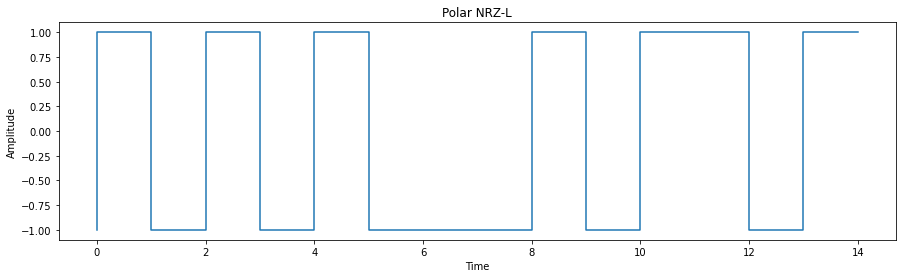

In [ ]:
encoded_bits = polar_nrz_l_encoding_scheme([0,1,0,1,0,1,0,0,0,1,0,1,1,0,1])
plt.figure(figsize=(15,4))
plt.plot(encoded_bits,drawstyle='steps-pre')
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Polar NRZ-L")
plt.show()

<br>

$$\color{#9A020B}{\textbf{NRZ-L Decoding } }$$

In [ ]:
decoded_bits=encoded_bits
decoded_bits=[0 if i==-1 else 1 for i in decoded_bits]
print("NRZ-L decoded bits :",decoded_bits)

NRZ-L decoded bits : [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1]


<br>
<br>
<br>

$$\color{#9A020B}{\textbf{NRZ-I Encoding } }$$



*   **No inversion: Next bit is 0**
*   **Inversion: Next bit is 1**



In [ ]:
bits = np.array([0,0,1,0,1,0,1,1,1,0,1,0,0,1,1])   
N = len(bits)   
input_signal = np.array([])
last_bit = 1
for i in range(N):
  if bits[i] == 1:
    temp = (-1) * last_bit
    last_bit = -last_bit
  else:
    temp = last_bit
  input_signal = np.append(input_signal,temp)
time = np.arange(0,len(input_signal),1)

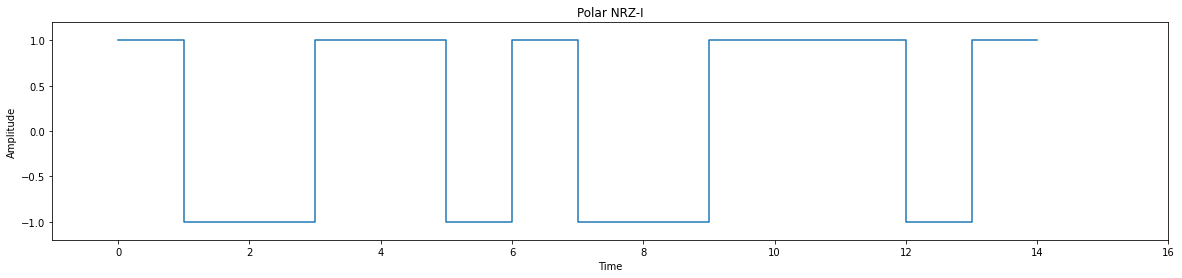

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(time,input_signal,drawstyle='steps-pre')
plt.axis([-1,16,-1.2,1.2])
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Polar NRZ-I")
plt.show()
#[0,0,1,0,1,0,1,0,1,1,1,0,0,1,1]

<br>

$$\color{#9A020B}{\textbf{NRZ-I Decoding } }$$

In [ ]:
# NRZ-I Decoding 
decoded_singal_bit = []
counter = 0
last_bit = 1
for i in range(len(input_signal)):
  if time[i] >= counter:
    counter = counter + 1
    if input_signal[i] != last_bit:
      decoded_singal_bit.append(1)
      last_bit=-last_bit
    else:
      decoded_singal_bit.append(0)
print(decoded_singal_bit)

[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1]


<br>
<br>

##$$\color{green}{\textbf{Block Coding and Decoding} }$$
<br>

**Block coding** changes a block of m bits into a block of n bits, where n is larger than m. Block coding is referred to as an **mB/nB** encoding technique. it replaces each m-bit group with an n-bit group. It helps in error detection and re-transmission of the signal. It is normally referred to as mB/nB coding as it replaces each m-bit data group with an n-bit data group (where n>m). Thus, its adds extra bits (redundancy bits) which helps in synchronization at receiver’s and sender’s end and also providing some kind of error detecting capability

<br>

$$\color{#9A020B}{\textbf{4B/5B Block Coding and Decoding } }$$

The **four binary/five binary (4B/5B)** coding scheme was designed to be used in combination with NRZ-I. Recall that NRZ-I has a good signal rate, one-half that of the
biphase, but it has a synchronization problem. A long sequence of 0s can make the
receiver clock lose synchronization. One solution is to change the bit stream, prior to
encoding with NRZ-I, so that it does not have a long stream of 0s. The 4B/5B scheme
achieves this goal. The block-coded stream does not have more that three consecutive
0s, as we will see later. At the receiver, the NRZ-I encoded digital signal is first
decoded into a stream of bits and then decoded to remove the redundancy. Figure 4.15
shows the idea.

<br>
<br>


<br>

$$\color{#9A020B}{\textbf{4B/5B Encoding} }$$
<br>


In [ ]:
encoding_maps = {
"0000": "01010",
"0001": "10010",
"0010": "10100",
"0011": "10101",
"0100": "11110",
"0101": "01011",
"0110": "01110",
"0111": "01111",
"1000": "01001",
"1001": "10011",
"1010": "10110",
"1011": "10111",
"1100": "11010",
"1101": "11011",
"1110": "11100",
"1111": "11101",
}
decoding_maps = {
"11110": "0000",
"01001": "0001",
"10100": "0010",
"10101": "0011",
"01010": "0100",
"01011": "0101",
"01110": "0110",
"01111": "0111",
"10010": "1000",
"10011": "1001",
"10110": "1010",
"10111": "1011",
"11010": "1100",
"11011": "1101",
"11100": "1110",
"11101": "1111",
}


In [ ]:
mB = 4
nB = 5
bits = np.array([0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1])

In [ ]:
if len(bits)%mB != 0:
  extra_zeros = np.array(np.zeros(mB-len(bits)%mB),dtype=int)
  bits = np.append(bits,extra_zeros)

encoded_bits = ""
for i in range(0, len(bits), mB):
  encoded_bits += encoding_maps.get("".join(map(str,bits[i:i+mB])))


encoded_bits = np.array(list(encoded_bits),dtype=int)
print(encoded_bits)

[0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0]


<br>

$$\color{#9A020B}{\textbf{4B/5B Decoding} }$$
<br>


In [ ]:
bits = encoded_bits
decoded_bits = ""
if len(bits)%nB !=0:
  print("There is an error in receiving code blocks")
for i in range(0, len(bits), nB):
  decoded_bits+= decoding_maps.get("".join(map(str,bits[i:i+nB])))

decoded_bits = np.array(list(decoded_bits),dtype=int)
print(decoded_bits)

[0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0]
